In [1]:
# Import necessary packages
library(dplyr)
library(stringr)
library(readr)
library(tidyr)
library(lfe)
library(lubridate)
library(ggplot2)
library(urbnmapr)
library(stargazer)
library(scales)
source('~/covid_mobility/paper_code/utils/labels_and_colors.r')
processed_data_directory <- '/nfs/sloanlab004/projects/covid_mobility_proj/data/PROCESSED_DATA/'
load(paste0(c(processed_data_directory,
              'geo_dyad_model_data.Rdata'),
            sep='',
            collapse=''))
source('../utils/latex_utils.R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘lubridate’


The following objects are masked from ‘package:dplyr’:

    intersect, setdiff, union


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Please cite as: 


 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




In [30]:
table(mobility_df_clean$gmr_pair, mobility_df_clean$stay_home_pair)

     
          0-0     0-1     1-0     1-1
  0-0 9128839   61368   68182 9247492
  0-1  566037       0 1581722       0
  1-0  583824 1504472       0       0
  1-1 4132114       0       0       0

In [5]:
# Estimate asinh model on whole sample
model_asinh <- felm(asinh_dest_cbg_visits_per_or ~ gmr_pair + stay_home_pair | 
              pair + ds | 0 | origin_state + destination_state, 
              weights = mobility_df_clean$max_device_count, 
              data = mobility_df_clean)

# Estimate log model on whole sample
model_log <- felm(log_dest_cbg_visits_per_or ~ gmr_pair + stay_home_pair | 
              pair + ds | 0 | origin_state + destination_state, 
              weights = mobility_df_clean$max_device_count, 
              data = mobility_df_clean)

# Estimate non-transformed model on whole sample
model <- felm(destination_cbg_visits_per_origin_device ~ gmr_pair + stay_home_pair | 
              pair + ds | 0 | origin_state + destination_state, 
              weights = mobility_df_clean$max_device_count, 
              data = mobility_df_clean)

Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”
Warning message in newols(mm, nostats = nostats[1], exactDOF = exactDOF, onlyse = onlyse, :
“Negative eigenvalues set to zero in multiway clustered variance matrix. See felm(...,psdef=FALSE)”


In [42]:
# Generate a table for whole sample models
mult = 100000 
star <- stargazer(model_asinh, model_log, model,
         covariate.labels = c('Or. = 0, Dest. = 1 (G/M/R)',
                              'Or. = 1, Dest. = 0 (G/M/R)',
                              'Or. = 1, Dest. = 1 (G/M/R)',
                              'Or. = 0, Dest. = 1 (shelter-in-place)',
                              'Or. = 1, Dest. = 0 (shelter-in-place)',
                              'Or. = 1, Dest. = 1 (shelter-in-place)'),
          dep.var.labels = c('asinh(dCBGs/device)',
                            'log(dCBGs/device + 1)',
                            'dCBGs/device'),
          coef = list(mult*coef(model_asinh), mult*coef(model_log), mult*coef(model)),
          se = list(mult*model_asinh$cse, 
                    mult*model_log$cse,
                    mult*model$cse),
          add.lines = list(
              c('Clustered s.e.', 'Yes', 'Yes', 'Yes'),
              c('Dyad fixed effect', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes')),
          label='tab:dyad_model_all',
          title='The effect of policy interventions on dyadic movement patterns (all connected counties)',
          notes.append=FALSE,
          notes.align='l',
          font.size='footnotesize',
          digits=2
         )

note.latex <- "\\multicolumn{4}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} Or. refers to the origin county, Dest. refers to the destination county. 1 indicates that a given policy is in place, whereas 0 indicates it is not. G/M/R refers to closing gyms, movie theaters, and/or restaurants, and shelter-in-place refers to a shelter in place order. dCBGs/device refers to the average number of census block groups in the destination county that devices from the origin county visited on a given day. All coefficients and standard errors are multiplied by 10,000. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/dyad_model_all.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, May 08, 2020 - 11:23:22 AM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on dyadic movement patterns (all connected counties)} 
  \label{tab:dyad_model_all} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & asinh(dCBGs/device) & log(dCBGs/device + 1) & dCBGs/device \\ 
\\[-1.8ex] & (1) & (2) & (3)\\ 
\hline \\[-1.8ex] 
 Or. = 0, Dest. = 1 (G/M/R) & $-$5.38$^{***}$ & $-$5.21$^{***}$ & $-$5.35$^{***}$ \\ 
  & (1.71) & (1.62) & (1.73) \\ 
  & & & \\ 
 Or. = 1, Dest. = 0 (G/M/R) & $-$0.04 & $-$0.32 & 0.08 \\ 
  & (3.21) & (2.97) & (3.27) \\ 
  & & & \\ 
 Or. = 1, Dest. = 1 (G/M/R) & $-$3.43$^{***}$ & $-$3.34$^{***}$ & $-$3.37$^{***}$ \\ 
  & (1.11) & (1.10) & (1.13) \\ 
  & & & \\ 
 Or. = 0, Dest. = 1 (

In [2]:
# Load in the counties info from urban mapr
get_urbn_map("counties") -> counties
counties %>%
    # Find and select adjacent counties
    inner_join(counties, by = c('lat', 'long')) %>%
    filter(county_fips.x != county_fips.y) %>%
    select(county1 = county_fips.x, county2 = county_fips.y) %>%
    distinct() %>%
    mutate(county1 = as.numeric(county1),
           county2 = as.numeric(county2)) -> adjacent_counties

In [3]:
# Reduce dataset down to adjacent counties only
mobility_df_clean %>% 
  mutate(origin_county = as.numeric(as.character(origin_county)),
         destination_county = as.numeric(as.character(destination_county))) %>%
  inner_join(
      adjacent_counties, by=c('origin_county' = 'county1', 'destination_county' = 'county2')
  ) -> mobility_df_adjacent

In [4]:
# Estimate asinh model for adjacent counties
model_adjacent_asinh <- felm(asinh_dest_cbg_visits_per_or ~ gmr_pair + stay_home_pair | 
              pair + ds | 0 | origin_state + destination_state, 
              weights = mobility_df_adjacent$max_device_count, 
              data = mobility_df_adjacent)

# Estimate log model for adjacent counties
model_adjacent_log <- felm(log_dest_cbg_visits_per_or ~ gmr_pair + stay_home_pair | 
              pair + ds | 0 | origin_state + destination_state, 
              weights = mobility_df_adjacent$max_device_count, 
              data = mobility_df_adjacent)

# Estimate non-transformed model for adjacent counties
model_adjacent <- felm(destination_cbg_visits_per_origin_device ~ gmr_pair + stay_home_pair | 
              pair + ds | 0 | origin_state + destination_state, 
              weights = mobility_df_adjacent$max_device_count, 
              data = mobility_df_adjacent)

In [43]:
# Generate a table for adjacent county models
mult = 1000
star <- stargazer(model_adjacent_asinh, model_adjacent_log, model_adjacent,
         covariate.labels = c('Or. = 0, Dest. = 1 (G/M/R)',
                              'Or. = 1, Dest. = 0 (G/M/R)',
                              'Or. = 1, Dest. = 1 (G/M/R)',
                              'Or. = 0, Dest. = 1 (shelter-in-place)',
                              'Or. = 1, Dest. = 0 (shelter-in-place)',
                              'Or. = 1, Dest. = 1 (shelter-in-place)'),
          dep.var.labels = c('asinh(dCBGs/device)',
                            'log(dCBGs/device + 1)',
                            'dCBGs/device'),
          coef = list(mult*coef(model_adjacent_asinh), mult*coef(model_adjacent_log), mult*coef(model_adjacent)),
          se = list(mult*model_adjacent_asinh$cse, 
                    mult*model_adjacent_log$cse,
                    mult*model_adjacent$cse),
          add.lines = list(
              c('Clustered s.e.', 'Yes', 'Yes', 'Yes'),
              c('Dyad fixed effect', 'Yes', 'Yes', 'Yes'),
              c('Day fixed effect', 'Yes', 'Yes', 'Yes')),
          label='tab:dyad_model_adjacent',
          title='The effect of policy interventions on dyadic movement patterns (adjacent counties)',
          font.size='footnotesize',
          notes.append=FALSE,
          notes.align='l',
          digits=2
         )

note.latex <- "\\multicolumn{4}{l} {\\parbox[t]{\\textwidth}{ \\textit{Notes:} Or. refers to the origin county, Dest. refers to the destination county. 1 indicates that a given policy is in place, whereas 0 indicates it is not. G/M/R refers to closing gyms, movie theaters, and/or restaurants, and shelter-in-place refers to a shelter in place order. dCBGs/device refers to the average number of census block groups in the destination county that devices from the origin county visited on a given day. All coefficients and standard errors are multiplied by 1,000. $^{*}$p$<$0.1; $^{**}$p$<$0.05; $^{***}$p$<$0.01}} \\\\"
star[grepl("Note",star)] <- note.latex
cat(star, sep = "\n", file = '../output/dyad_model_adjacent.tex')


% Table created by stargazer v.5.2.2 by Marek Hlavac, Harvard University. E-mail: hlavac at fas.harvard.edu
% Date and time: Fri, May 08, 2020 - 11:24:27 AM
\begin{table}[!htbp] \centering 
  \caption{The effect of policy interventions on dyadic movement patterns (adjacent counties)} 
  \label{tab:dyad_model_adjacent} 
\footnotesize 
\begin{tabular}{@{\extracolsep{5pt}}lccc} 
\\[-1.8ex]\hline 
\hline \\[-1.8ex] 
 & \multicolumn{3}{c}{\textit{Dependent variable:}} \\ 
\cline{2-4} 
\\[-1.8ex] & asinh(dCBGs/device) & log(dCBGs/device + 1) & dCBGs/device \\ 
\\[-1.8ex] & (1) & (2) & (3)\\ 
\hline \\[-1.8ex] 
 Or. = 0, Dest. = 1 (G/M/R) & $-$3.60 & $-$2.90 & $-$3.84 \\ 
  & (2.67) & (2.13) & (2.89) \\ 
  & & & \\ 
 Or. = 1, Dest. = 0 (G/M/R) & 0.42 & 0.33 & 0.48 \\ 
  & (1.34) & (1.15) & (1.40) \\ 
  & & & \\ 
 Or. = 1, Dest. = 1 (G/M/R) & $-$0.98$^{*}$ & $-$0.91$^{*}$ & $-$0.94$^{*}$ \\ 
  & (0.50) & (0.47) & (0.51) \\ 
  & & & \\ 
 Or. = 0, Dest. = 1 (shelter-in-place) & $-$11.63$^{***}$

In [6]:
# Create coefficients vector, and modify SiP coefficients to be non-marginal
coefs_for_df <- c(coef(model_asinh), coef(model_adjacent_asinh))

# Create se vector, and modify SiP se to be non-marginal
se_for_df <- c(sqrt(diag(model_asinh$clustervcv)),
               sqrt(diag(model_adjacent_asinh$clustervcv)))

# Construct df for plotting
df_for_plot <- data.frame(coef = coefs_for_df,
                          se = se_for_df,
                          clusters = c(rep('All county pairs', 6),
                                      rep('Adjacent county pairs', 6)),
                          policy = rep(c(rep('Close gyms,\nmovie theaters,\nrestaurants', 3),
                                         rep('Shelter-in-place', 3)), 2),
                          pair = rep(c('Destination\nonly', 'Origin\nonly', 'Both'), 4))

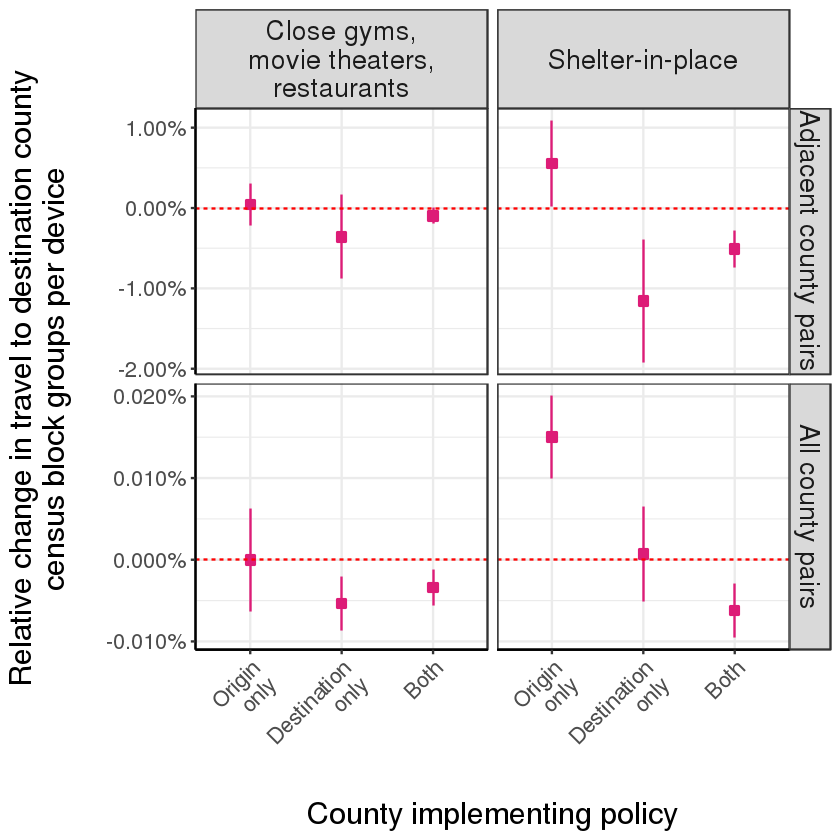

In [52]:
# Generate and save plot
geodyad_plot <- df_for_plot %>% 
  mutate(pair = factor(pair, ordered=TRUE, levels=c('Origin\nonly', 'Destination\nonly', 'Both')),
         lb = coef - 1.96*se,
         ub = coef + 1.96*se,
         coef = exp(coef) - 1,
         lb = exp(lb) - 1,
         ub = exp(ub) - 1
        ) %>%
  ggplot(., aes(x=pair, y=coef, ymin=lb, ymax=ub, color='Safegraph', shape='Safegraph',
               fill='Safegraph')) + 
  geom_pointrange() + 
  scale_color_manual(values = outcome_source_colors) +
  scale_shape_manual(values = outcome_source_shapes) +
  scale_fill_manual(values = outcome_source_colors) +
  facet_grid(clusters ~ policy, scales='free_y') + 
  theme(axis.text.x = element_text(angle = 45, hjust = 1, size=13),
        axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
       strip.text.y = element_text(size=16),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
       legend.position='none') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  scale_y_continuous(labels=percent) + 
  xlab('\nCounty implementing policy') + 
  ylab('Relative change in travel to destination county\ncensus block groups per device\n')
geodyad_plot

In [53]:
# Write plot to output
ggsave(
  paste0("../output/geodyad_plot.pdf"),
  plot = geodyad_plot,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 6,
  height = 6,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

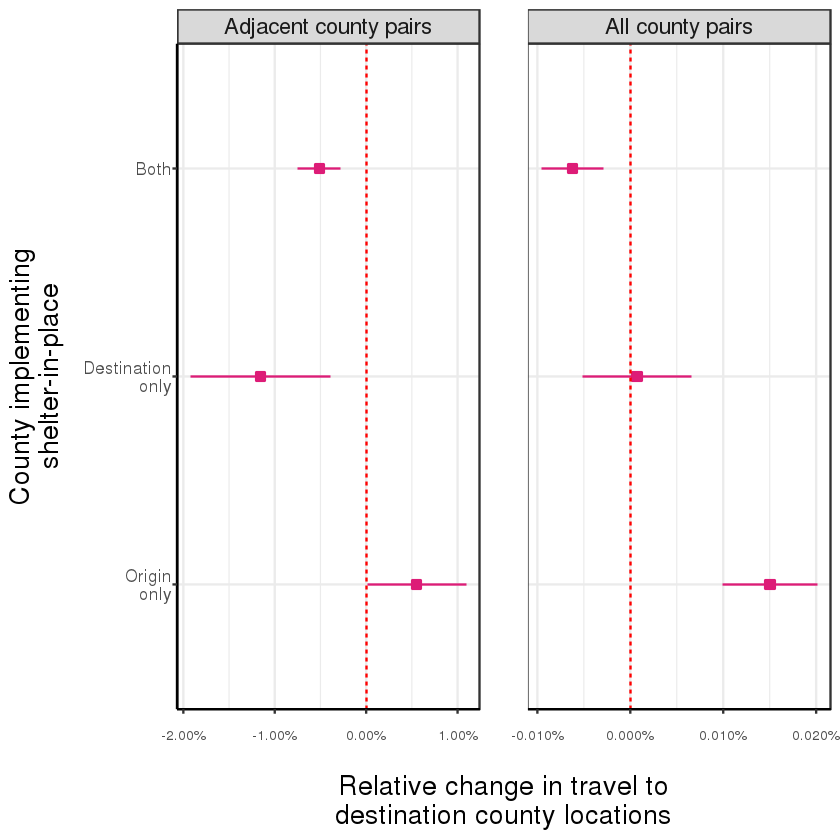

In [47]:
# Generate plot
geodyad_plot_coord_flip <- df_for_plot %>% 
  mutate(pair = factor(pair, ordered=TRUE, levels=c('Origin\nonly', 'Destination\nonly', 'Both')),
         lb = coef - 1.96*se,
         ub = coef + 1.96*se,
         coef = exp(coef) - 1,
         lb = exp(lb) - 1,
         ub = exp(ub) - 1
        ) %>%
  filter(policy == 'Shelter-in-place') %>%
  ggplot(., aes(x=coef, y=pair, xmin=lb, xmax=ub, 
                color='Safegraph', shape='Safegraph',
                fill='Safegraph')) + 
  geom_pointrange() + 
  scale_color_manual(values = outcome_source_colors) +
  scale_shape_manual(values = outcome_source_shapes) +
  scale_fill_manual(values = outcome_source_colors) +
  facet_grid(~ clusters, scales='free_x', switch='y') + 
  theme(axis.text.y = element_text(hjust = 1, size=10, margin = margin(t = 0, r = 0, b = 0, l = 10)),
        axis.text.x = element_text(size=8, margin = margin(t = 10, r = 0, b = 0, l = 0)),
        axis.title = element_text(size=16),
        strip.text.x = element_text(size=13),
        strip.text.y.left = element_text(size=13, angle = 0),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
        panel.spacing.x=unit(2, "lines"),
       strip.placement.y = 'outside',
       legend.position='none') + 
  geom_vline(xintercept=0, color='red', linetype='dashed') + 
  scale_x_continuous(labels=percent) + 
  scale_y_discrete(position='left') +
  ylab(str_wrap('County implementing shelter-in-place', 26)) + 
  xlab('\nRelative change in travel to\ndestination county locations')
geodyad_plot_coord_flip

In [48]:
# Write plot to output
ggsave(
  paste0("../output/geodyad_plot_coord_flip.pdf"),
  plot = geodyad_plot_coord_flip,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 6.5,
  height = 5.5,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


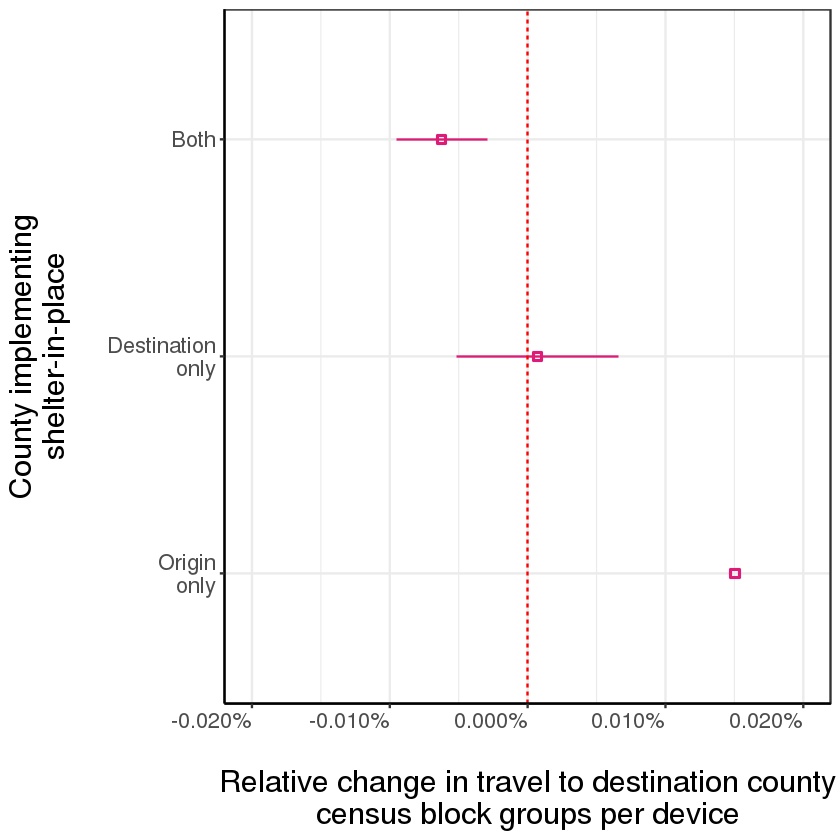

In [49]:
# Generate plot
geodyad_plot_sip_all <- df_for_plot %>% 
  mutate(pair = factor(pair, ordered=TRUE, levels=c('Origin\nonly', 'Destination\nonly', 'Both')),
         lb = coef - 1.96*se,
         ub = coef + 1.96*se,
         coef = exp(coef) - 1,
         lb = exp(lb) - 1,
         ub = exp(ub) - 1
        ) %>%
  filter(clusters == 'All county pairs' & policy == 'Shelter-in-place') %>%
  ggplot(., aes(x=pair, y=coef, ymin=lb, ymax=ub, 
                color='Safegraph', shape='Safegraph')) + 
  geom_pointrange() + 
  scale_color_manual(values = outcome_source_colors) +
  scale_shape_manual(values = outcome_source_shapes) +
  theme(axis.text.x = element_text(hjust = 1, size=13),
        axis.text.y = element_text(size=13),
        axis.title = element_text(size=18),
        strip.text.x = element_text(size=16),
        strip.text.y = element_text(size=16),
        panel.background = element_blank(),
        axis.line = element_line(colour = "black"),
       legend.position='none') + 
  geom_hline(yintercept=0, color='red', linetype='dashed') + 
  scale_y_continuous(labels=percent, lim=c(-0.0002, 0.0002)) + 
  xlab('County implementing\nshelter-in-place\n') + 
  ylab('\nRelative change in travel to destination county\ncensus block groups per device') + coord_flip()
geodyad_plot_sip_all

In [50]:
# Write plot to output
ggsave(
  paste0("../output/geodyad_plot_sip_all.pdf"),
  plot = geodyad_plot_sip_all,
  device = NULL,
  path = NULL,
  scale = 1.2,
  width = 6,
  height = 4,
  units = c("in"),
  dpi = 200,
  limitsize = FALSE,
  useDingbats=FALSE
)

Warning message:
“Removed 1 rows containing missing values (geom_segment).”


In [8]:
results_df <- df_for_plot %>% 
  mutate(lb = coef - 1.96*se,
         ub = coef + 1.96*se,
         coef = round(100*(exp(coef) - 1), 2),
         lb = round(100*(exp(lb) - 1), 2),
         ub = round(100*(exp(ub) - 1), 2))

results_df

coef,se,clusters,policy,pair,lb,ub
<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>
-0.01,1.706671e-05,All county pairs,"Close gyms, movie theaters, restaurants",Destination only,-0.01,0.00
0.00,3.210832e-05,All county pairs,"Close gyms, movie theaters, restaurants",Origin only,-0.01,0.01
0.00,1.111284e-05,All county pairs,"Close gyms, movie theaters, restaurants",Both,-0.01,0.00
0.00,2.985734e-05,All county pairs,Shelter-in-place,Destination only,-0.01,0.01
0.02,2.584317e-05,All county pairs,Shelter-in-place,Origin only,0.01,0.02
-0.01,1.684585e-05,All county pairs,Shelter-in-place,Both,-0.01,0.00
-0.36,2.671169e-03,Adjacent county pairs,"Close gyms, movie theaters, restaurants",Destination only,-0.88,0.16
0.04,1.341741e-03,Adjacent county pairs,"Close gyms, movie theaters, restaurants",Origin only,-0.22,0.31
-0.10,5.030533e-04,Adjacent county pairs,"Close gyms, movie theaters, restaurants",Both,-0.20,0.00


In [14]:
source('../utils/latex_utils.R')
out.file <- "../output/numerical_results.tex"
addParam <- genParamAdder(out.file)

geodyad_dd_both <- abs((results_df %>% 
  filter(str_detect(as.character(clusters), 'Adjacent') & str_detect(as.character(pair), 'Both') & 
        str_detect(as.character(policy), 'Shelter')))$coef)
geodyad_dd_origin <- abs((results_df %>% 
  filter(str_detect(as.character(clusters), 'Adjacent') & str_detect(as.character(pair), 'Origin') & 
        str_detect(as.character(policy), 'Shelter')))$coef)
geodyad_dd_destination <- abs((results_df %>% 
  filter(str_detect(as.character(clusters), 'Adjacent') & str_detect(as.character(pair), 'Destination') & 
        str_detect(as.character(policy), 'Shelter')))$coef)

addParam("\\geodyadddboth", formatParamString(geodyad_dd_both))
addParam("\\geodyadddorigin", formatParamString(geodyad_dd_origin))
addParam("\\geodyaddddestination", formatParamString(geodyad_dd_destination))

[1] "Updated: \\geodyadddboth from 0.51 to 0.51"
[1] "Updated: \\geodyadddorigin from 0.55 to 0.55"
[1] "Updated: \\geodyaddddestination from 1.2 to 1.2"
